**<font color = black size=6>实验四:模型评估</font>**

**<font color = blue size=4>第一部分:数据集划分</font>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
import random
warnings.filterwarnings('ignore')

<span style="color:purple">给定一个完整的数据集，尚未划分训练集和测试集，我们需要手动实现训练集和测试集的划分:</span>

<span style="color:purple">我们继续使用iris数据集(iris.csv)，这次我们引入了具有4个特征 (花萼长度($x_1$)，花萼宽度 ($x_2$),花瓣长度 ($x_3$),花瓣宽度 ($x_4$))和两个标签 (Setosa，Versicolour)的100个样本数据，其中每类标签的样本占50%。我们需要将其划分为训练集和测试集，其中测试集中的样本数量占总数量的30%(也就是30个)，且测试集中每个标签的样本各占50%</span>

<span style="color:purple">1) 留出法</span>

<span style="color:purple">我们通过随机选择样本的方式将数据分割为训练集和测试集，并保持两种标签的数据的数量一致</span>

In [2]:
#通过pandas将csv文件转换为dataframe格式后进行操作
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 计算每个类别需要分配给测试集的样本数量的比例，假设为 30%
test_ratio = 0.3

# 计算每个类别需要分配给测试集的样本数量
test_samples_per_class = (labels.value_counts() * test_ratio).astype(int)

# 初始化测试集和训练集
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# 根据标签的分布进行采样
for label, count in test_samples_per_class.items():
    class_samples = df[df['Species'] == label].sample(n=count, random_state=42)
    test_data = test_data.append(class_samples)
    train_data = train_data.append(df[df['Species'] == label].drop(class_samples.index))

# 获取训练集和测试集的特征和标签
train_features = train_data.iloc[:, :-1]
train_labels = train_data.iloc[:, -1]
test_features = test_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1]

# 打印训练集和测试集大小
print("Train data number: ", len(train_data))
print("Test data number: ", len(test_data))

#打印训练集和测试集
print("Train data : ", np.array(train_data))
print("Test data : ", np.array(test_data))

Train data number:  70
Test data number:  30
Train data :  [[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1.6 0.6 0. ]
 [5.1 3.8 1.9 0.4 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [4.6 3.2 1.4 0.2 0. ]
 [5.  3.3 1.4 0.2 0. ]
 [6.3 3.3 6.  2.5 1. ]
 [5.8 2.7 5.1 1.9 1. ]
 [7.1 3.  5.9 2.1 1. ]
 [7.6 3.  6.6 2.1 1. ]
 [4.9 2.5 4.5 1.7 1. ]
 [7.3 2.9 6.3 1.8 1. 

<span style="color:purple">2) 交叉验证法</span>

<span style="color:purple">我们将数据集分割为k个大小相等且标签数量类似的子数据集，每个迭代中选取一个子数据集作为测试集，剩余k-1个组成训练集，并保持两种标签的数据的数量一致</span>

In [3]:
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 将数据按照标签分为两类
class_0_samples = df[df['Species'] == 0]
class_1_samples = df[df['Species'] == 1]

# 将每一类别的样本随机排序
class_0_samples = class_0_samples.sample(frac=1, random_state=42)
class_1_samples = class_1_samples.sample(frac=1, random_state=42)


# 进行 k 折交叉验证
k = 5

# 初始化训练集和测试集的列表
train_data = []
test_data = []

for i in range(k):
    # 初始化当前折的训练集和测试集
    train_fold = pd.DataFrame()
    test_fold = pd.DataFrame()

    # 计算当前折中每个类别的样本数量
    class_0_fold_size = len(class_0_samples) // k
    class_1_fold_size = len(class_1_samples) // k
    

    # 添加当前折中每个类别的样本到测试集
    test_fold = test_fold.append(class_0_samples[i * class_0_fold_size: (i + 1) * class_0_fold_size])
    test_fold = test_fold.append(class_1_samples[i * class_1_fold_size: (i + 1) * class_1_fold_size])
    
    # 添加剩余样本到训练集
    train_fold = df.drop(test_fold.index)

    # 打乱训练集和测试集的顺序，以便更好的随机性
    train_fold = train_fold.sample(frac=1, random_state=42)
    test_fold = test_fold.sample(frac=1, random_state=42)

    # 将当前折的训练集和测试集添加到列表
    train_data.append(train_fold)
    test_data.append(test_fold)

# 打印每一折的测试集索引，可以看到均为不重复样本
for i in range(k):
    print("第", i+1, "折的测试集: ", (test_data[i].index))

第 1 折的测试集:  Int64Index([13, 75, 98, 39, 32, 48, 89, 45, 82, 76, 95, 30, 19, 69, 17, 80, 25,
            63, 67, 26],
           dtype='int64')
第 2 折的测试集:  Int64Index([12, 96, 56, 4, 47, 6, 54, 8, 97, 91, 58, 37, 15, 65, 3, 87, 46, 62,
            53, 41],
           dtype='int64')
第 3 折的测试集:  Int64Index([9, 77, 50, 16, 33, 0, 66, 34, 83, 94, 84, 24, 5, 55, 31, 74, 27,
            59, 81, 44],
           dtype='int64')
第 4 折的测试集:  Int64Index([29, 85, 52, 11, 23, 2, 61, 1, 73, 93, 51, 36, 40, 90, 21, 86, 35,
            79, 71, 43],
           dtype='int64')
第 5 折的测试集:  Int64Index([10, 64, 57, 22, 28, 7, 72, 49, 78, 92, 99, 18, 38, 88, 20, 68, 14,
            60, 70, 42],
           dtype='int64')


<span style="color:purple">3) 自助法</span>

<span style="color:purple">我们使用有放回采样的方式，每次选取选取一个样本加入到训练集，抽取样本数量(100)次后，将未被选择的样本组成测试集</span>

In [4]:
df = pd.read_csv('iris.csv')

#将label标签内容从字符串替换为数值
df['Species'] = df['Species'].map({'setosa': 0, 'virginica': 1}).fillna(-1)

# 获取特征和标签列
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 创建自助样本集
num_samples = df.shape[0]
train_data = []
test_data = []

for i in range(num_samples):
    index = random.randint(0, num_samples-1)
    train_data.append(df.iloc[index])

# 创建测试集（排除训练集中已存在的样本）
for _, row in df.iterrows():
    is_in_train_data = False
    for train_row in train_data:
        if row.equals(train_row):
            is_in_train_data = True
            break
    if not is_in_train_data:
        test_data.append(row)

# 打印训练集和测试集大小
print("训练集大小: ", len(train_data))
print("测试集大小: ", len(test_data))


训练集大小:  100
测试集大小:  35


**<font color = blue size=4>第二部分:性能度量</font>**

<span style="color:purple">1) 回归任务:</span>

<span style="color:purple">均方误差(MSE): 计算模型的预测 $\hat{Y}$ 与真实标签 $Y$ 的接近程度</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\},其中$x_i$为样本$i$的特征值,$y_i$为样本$i$的标签值, $f$为训练的模型,该模型$f$在$D$的均方误差为$$E(f;D) = \frac{1}{m}\sum_{i=1}^{m}{(f(x_i)-y_i)^2}$$

<span style="color:purple">2)分类任务:</span>

<span style="color:purple">2.1)错误率: 分类错误样本占比</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本$i$的预测标签, 该模型$f$在$D$的错误率为$$E(f;D) = \frac{1}{m}\sum_{i=1}^{m}{Ⅱ(f(x_i)\neq y_i)}$$

<span style="color:purple">2.2)精确率: 分类正确样本占比</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本i的预测标签, 该模型$f$在$D$的精度为$$acc(f;D) = \frac{1}{m}\sum_{i=1}^{m}{Ⅱ(f(x_i) = y_i)} = 1 - E(f;D)$$

<span style="color:purple">2.3)查准率和查全率: 正例被预测出来的比率和预测出来的正例中正确的比率</span>

给定一组测试集样本$D$ = \{$(x_1,y_1),(x_2,y_2), ... ,(x_m,y_m)$\}, 其中$x_i$为样本$i$的特征值, $y_i$为样本$i$的真实标签, $f$为训练的模型, $f(x_i)$为样本i的预测标签.

我们假定该类样本中label为1(正例)和0(反例):

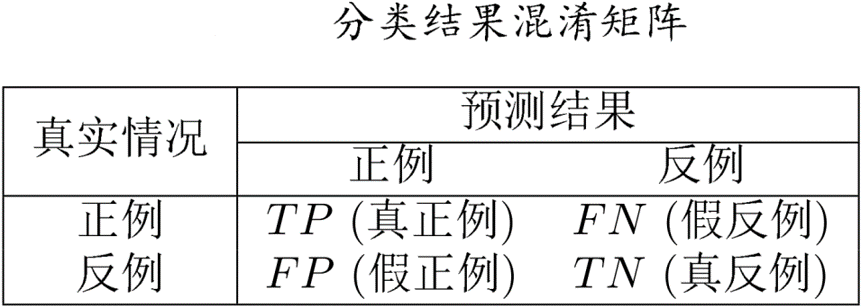

TP(真正例):$$\sum_{i=1}^{m}{Ⅱ(y_i=1 \quad \&\&\quad (f(x_i)= y_i))},$$

FP(假正例):$$\sum_{i=1}^{m}{Ⅱ(y_i=1 \quad \&\&\quad (f(x_i)\neq y_i))},$$

FN(假反例):$$\sum_{i=1}^{m}{Ⅱ(y_i=0 \quad \&\&\quad (f(x_i)\neq y_i))},$$

其中查准率(precision):$$\frac{TP}{TP+FP},$$

查全率(recall):$$\frac{TP}{TP+FN}.$$



<span style="color:purple">2.4)P-R曲线: 根据模型的预测结果按正例可能性大小对样例进行排序，并逐个把样本作为正例进行预测，则可以得到查准率-查全率曲线</span>

计算出所有用户的正例可能性:$P(y=1|x;w)$,并进行排序

从高到低以每个用户的正例可能性为【阈值】，根据$\hat{Y}=1$, if $P(y=1|x;w) \geq 【阈值】$，得到一个坐标点(precision,recall)

记录每个坐标点(precision,recall)的F1度量: $F1 = \frac{2*P*R}{P+R}$

最后将得到的所有(precision,recall)画成折线图

给出一个简易的折线图的画图例子

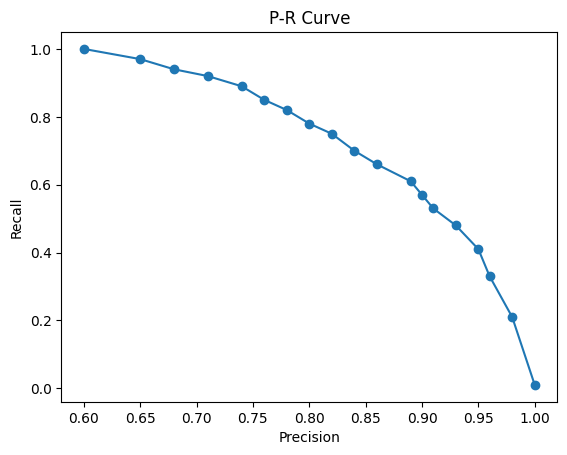

In [5]:
thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
recall     = [1.00, 0.97, 0.94, 0.92, 0.89, 0.85, 0.82, 0.78, 0.75, 0.70, 0.66, 0.61, 0.57, 0.53, 0.48, 0.41, 0.33, 0.21, 0.01]
precision  = [0.60, 0.65, 0.68, 0.71, 0.74, 0.76, 0.78, 0.80, 0.82, 0.84, 0.86, 0.89, 0.9, 0.91, 0.93, 0.95, 0.96, 0.98, 1.00]


plt.plot(precision,recall, marker='o')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('P-R Curve')
plt.show()

<span style="color:purple">2.5)ROC曲线: 根据模型的预测结果按正例可能性大小对样例进行排序，并逐个把样本作为正例进行预测，得到一组(FPR,TPR)，进而得到ROC曲线</span>

其中$TPR=\frac{TP}{TP+FN}$,$FPR=\frac{FP}{TN+FP}.$

**<font color = blue size=4>第四部分:课堂实验</font>**

我们引入了一个骨科患者的生物力学特征数据集(illness.csv)，每个患者在数据集中由六个生物力学属性表示，这些属性分别为pelvic_incidence（盆腔发病率）、pelvic_tilt numeric（骨盆倾斜）、lumbar_lordosis_angle（腰椎前凸角）、sacral_slope（骶骨斜率）、pelvic_radius（骨盆桡骨）、pelvic_radius（脊椎滑脱分级), 对应的标签则为是否为椎间盘疝气和脊椎滑脱(normal和abnormal).

该数据集共有310个样本，但并没有划分训练集和测试集.

<span style="color:purple">1)导入数据集,根据数据信息定义逻辑回归的模型</span>

In [6]:
#your code here
#通过pandas将csv文件转换为dataframe格式后进行操作
dataframe = pd.read_csv('illness.csv')


<span style="color:purple">2)请分别使用三种数据划分方式(留出法、交叉验证法、自助法)划分出训练集和测试集</span>

In [7]:
#留出法

#将label标签内容进行数字编码,未匹配的标签填充为-1
dataframe['class'] = dataframe['class'].map({'Abnormal': 0, 'Normal': 1}).fillna(-1)

# 获取特征(除最后一列外的所有列)和标签列(最后一列)
features = dataframe.iloc[:, :-1]
labels = dataframe.iloc[:, -1]

# 计算测试集每个类别的样本比例，假设为 30%
test_ratio = 0.3

# 计算测试集每个类别的样本数量
test_samples_per_class = (labels.value_counts() * test_ratio).astype(int)

# 初始化测试集和训练集
train_data_ho = pd.DataFrame()
test_data_ho = pd.DataFrame()

# 根据标签的分布进行采样
for label, count in test_samples_per_class.items():
    class_samples = dataframe[dataframe['class'] == label].sample(n=count, random_state=42)
    test_data_ho = test_data_ho.append(class_samples)
    train_data_ho = train_data_ho.append(dataframe[dataframe['class'] == label].drop(class_samples.index))

# 获取训练集和测试集的特征和标签
train_features_ho = train_data_ho.iloc[:, :-1]
train_labels_ho = train_data_ho.iloc[:, -1]
test_features_ho = test_data_ho.iloc[:, :-1]
test_labels_ho = test_data_ho.iloc[:, -1]

# 打印训练集和测试集大小
print("Train data number of Hold-Out: ", len(train_data_ho))
print("Test data number of Hold-Out: ", len(test_data_ho))

#打印训练集和测试集
print("Train data of Hold-Out: ", np.array(train_data_ho))
print("Test data of Hold-Out: ", np.array(test_data_ho))


Train data number of Hold-Out:  217
Test data number of Hold-Out:  93
Train data of Hold-Out:  [[ 63.0278175   22.55258597  39.60911701 ...  98.67291675  -0.25439999
    0.        ]
 [ 39.05695098  10.06099147  25.01537822 ... 114.4054254    4.56425864
    0.        ]
 [ 68.83202098  22.21848205  50.09219357 ... 105.9851355   -3.53031731
    0.        ]
 ...
 [ 61.44659663  22.6949683   46.17034732 ... 125.6707246   -2.70787952
    1.        ]
 [ 45.25279209   8.69315736  41.5831264  ... 118.5458418    0.21475017
    1.        ]
 [ 33.84164075   5.07399141  36.64123294 ... 123.9452436   -0.19924909
    1.        ]]
Test data of Hold-Out:  [[ 50.81926781  15.40221253  42.52893886  35.41705528 112.192804
   10.86956554   0.        ]
 [ 56.66829282  13.45820343  43.76970978  43.21008939  93.69220863
   21.10812135   0.        ]
 [ 76.32600187  42.39620445  57.19999999  33.92979742 124.267007
   50.12745689   0.        ]
 [ 75.29847847  16.67148361  61.29620362  58.62699486 118.8833881
   

In [8]:
#交叉验证法

# 将数据按照标签分为两类
class_0_samples = dataframe[dataframe['class'] == 0]
class_1_samples = dataframe[dataframe['class'] == 1]

# 将每一类别的样本随机排序
class_0_samples = class_0_samples.sample(frac=1, random_state=42)
class_1_samples = class_1_samples.sample(frac=1, random_state=42)

# 进行 5 折交叉验证
k = 5

# 初始化训练集和测试集的列表
train_data_kf = []
test_data_kf = []

for i in range(k):
    # 初始化当前折的训练集和测试集
    train_fold = pd.DataFrame()
    test_fold = pd.DataFrame()

    # 计算当前折中每个类别的样本数量
    class_0_fold_size = len(class_0_samples) // k
    class_1_fold_size = len(class_1_samples) // k
    
    # 添加当前折中每个类别的样本到测试集
    test_fold = test_fold.append(class_0_samples[i * class_0_fold_size: (i + 1) * class_0_fold_size])
    test_fold = test_fold.append(class_1_samples[i * class_1_fold_size: (i + 1) * class_1_fold_size])
    
    # 添加剩余样本到训练集
    train_fold = dataframe.drop(test_fold.index)

    # 打乱训练集和测试集的顺序，以便更好的随机性
    train_fold = train_fold.sample(frac=1, random_state=42)
    test_fold = test_fold.sample(frac=1, random_state=42)

    # 将当前折的训练集和测试集添加到列表
    train_data_kf.append(train_fold)
    test_data_kf.append(test_fold)

# 打印每一折的测试集索引，可以看到均为不重复样本
for i in range(k):
    print("第", i+1, "折的测试集: ", (test_data_kf[i].index))

第 1 折的测试集:  Int64Index([220, 300,  30, 214, 155, 232, 165, 207, 142, 287, 192, 196, 249,
            126,  67, 104, 199,  18, 283,   9,  45,  69,  60, 255,  93, 228,
            180, 240, 162, 286,  73, 197, 125,  25, 108, 280, 187, 101, 243,
            263,  95, 173, 254, 172,  55,  84, 290, 159, 132, 109, 222, 136,
            147, 168, 241,  75, 182, 293,  15,  16, 210,  82],
           dtype='int64')
第 2 折的测试集:  Int64Index([219, 303, 150, 215,  86, 250,  65,  19,  31, 275, 115, 183, 225,
            135,  51, 118,  68,   5, 295,  24, 100,  98, 156, 252,  56, 221,
             76, 257,  26, 276,  66, 124,  35,  12, 208, 236,  29, 143, 238,
            298,  41,  42, 279,  96, 128, 200, 306,  78, 170, 205, 245, 117,
             79, 146, 226,  97,  38, 265, 139,  28, 282, 203],
           dtype='int64')
第 3 折的测试集:  Int64Index([272, 218, 140, 288,  46, 291, 111, 119, 144, 274, 120,  85, 229,
             61,  10,  62,   2,  33, 227,  90, 127, 194,  77, 305, 204, 234,
            153,

In [9]:
#自助法

# 创建自助样本集
num_samples = dataframe.shape[0]
train_data_bs = []
test_data_bs = []

for i in range(num_samples):
    index = random.randint(0, num_samples-1)
    train_data_bs.append(dataframe.iloc[index])

# 创建测试集（排除训练集中已存在的样本）
for _, row in dataframe.iterrows():
    is_in_train_data = False
    for train_row in train_data_bs:
        if row.equals(train_row):
            is_in_train_data = True
            break
    if not is_in_train_data:
        test_data_bs.append(row)

# 打印训练集和测试集大小
print("训练集大小: ", len(train_data_bs))
print("测试集大小: ", len(test_data_bs))


训练集大小:  310
测试集大小:  113


<span style="color:purple">3)请分别在三种数据划分方式(留出法、交叉验证法、自助法)所划分出训练集和测试集下训练逻辑回归模型,并测试错误率\精度</span>

In [10]:
#留出法测试精度
#your code here

# 分离 x1 列、 x2 列和标签列
x1_ho_train = train_data_ho['pelvic_incidence']
x2_ho_train = train_data_ho['pelvic_tilt numeric']
x3_ho_train = train_data_ho['lumbar_lordosis_angle']
x4_ho_train = train_data_ho['sacral_slope']
x5_ho_train = train_data_ho['pelvic_radius']
x6_ho_train = train_data_ho['degree_spondylolisthesis']
y_ho_train  = train_data_ho['class']

# 往特征中加入一列全1的特征量
X_ho_train = np.column_stack((x1_ho_train,x2_ho_train,x3_ho_train,x4_ho_train,x5_ho_train,x6_ho_train))
X_ho_train = np.c_[np.ones(X_ho_train.shape[0]), X_ho_train]

# 获取数据长度
m_ho_train = len(y_ho_train)

# 初始化权重参数 𝜔
w_ho_train = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# 超参数(学习率、小批量大小、迭代次数)设置
learning_rate = 0.01
max_epochs = 1000

# 用于记录损失值
loss_history = []

for epoch in range(max_epochs):
    # 计算预测值
    z = np.dot(X_ho_train, w_ho_train)
    y_pred =1 / (1 + np.exp(-z))
    
    # 计算梯度
    gradient = np.dot(X_ho_train.T, (y_pred - y_ho_train)) / m_ho_train

    # 更新权重参数
    w_ho_train -= learning_rate * gradient
    
# 打印最终参数 w
print("最终参数 w:", w_ho_train)


# 分离 x1 列、 x2 列和标签列
x1_ho_test = test_data_ho['pelvic_incidence']
x2_ho_test = test_data_ho['pelvic_tilt numeric']
x3_ho_test = test_data_ho['lumbar_lordosis_angle']
x4_ho_test = test_data_ho['sacral_slope']
x5_ho_test = test_data_ho['pelvic_radius']
x6_ho_test = test_data_ho['degree_spondylolisthesis']
y_ho_test = test_data_ho['class']

# 往特征中加入一列全1的特征量
X_ho_test = np.column_stack((x1_ho_test, x2_ho_test, x3_ho_test, x4_ho_test, x5_ho_test, x6_ho_test))
X_ho_test = np.c_[np.ones(X_ho_test.shape[0]), X_ho_test]

# 计算测试集上的预测值
z_ho_test = np.dot(X_ho_test, w_ho_train)
y_pred_ho_test = 1 / (1 + np.exp(-z_ho_test))

# 将预测概率转化为类别标签
y_pred_ho_test[y_pred_ho_test >= 0.5] = 1
y_pred_ho_test[y_pred_ho_test < 0.5] = 0

# 计算错误分类的样本数量
misclassified_samples = np.sum(y_pred_ho_test != y_ho_test)

# 计算错误率和精度
error_rate_ho = misclassified_samples / len(y_ho_test)
accuracy_ho = 1 - error_rate_ho

print("错误率:", error_rate_ho)
print("精度:", accuracy_ho)


最终参数 w: [-0.08100194 -0.47022041 -1.21469161  0.55904468  0.7444712  -0.11105006
 -2.17443887]
错误率: 0.21505376344086022
精度: 0.7849462365591398


In [11]:
#交叉验证法
#your code here
#每次选用一个子集作为测试集，剩余k-1个子集的并集作为训练集，所以需要每轮都进行测试
#可以使用k个轮次的精度的平均精度作为本方法的最终精度
# 初始化一个列表来存储每个折的精度
# 交叉验证的折数
k = 5

# 初始化一个列表来存储每个折的精度
accuracy_scores = []

for i in range(k):
    # 获取当前折的训练集和测试集
    train_fold = train_data_kf[i]
    test_fold = test_data_kf[i]

    # 分离 x 和 y
    x_train_kf = train_fold.drop('class', axis=1)
    y_train_kf = train_fold['class']
    x_test_kf = test_fold.drop('class', axis=1)
    y_test_kf = test_fold['class']

    # 往特征中加入一列全1的特征量
    X_train = np.column_stack((x_train_kf['pelvic_incidence'], x_train_kf['pelvic_tilt numeric'], x_train_kf['lumbar_lordosis_angle'],
                                x_train_kf['sacral_slope'], x_train_kf['pelvic_radius'], x_train_kf['degree_spondylolisthesis']))
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]

    # 获取数据长度
    m_kf_train = len(y_train_kf)

    # 初始化权重参数 𝜔
    w_kf_train = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    # 超参数(学习率、迭代次数)设置
    learning_rate = 0.01
    max_epochs = 1000

    # 用于记录损失值
    loss_history = []

    for epoch in range(max_epochs):
        # 计算预测值
        z = np.dot(X_train, w_kf_train)
        y_pred = 1 / (1 + np.exp(-z))

        # 计算梯度
        gradient = np.dot(X_train.T, (y_pred - y_train_kf)) / m_kf_train

        # 更新权重参数
        w_kf_train -= learning_rate * gradient

    # 使用训练好的参数在测试集上进行预测
    X_test = np.column_stack((x_test_kf['pelvic_incidence'], x_test_kf['pelvic_tilt numeric'], x_test_kf['lumbar_lordosis_angle'],
                              x_test_kf['sacral_slope'], x_test_kf['pelvic_radius'], x_test_kf['degree_spondylolisthesis']))
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    z_test = np.dot(X_test, w_kf_train)
    y_pred_test = 1 / (1 + np.exp(-z_test))
    y_pred_test[y_pred_test >= 0.5] = 1
    y_pred_test[y_pred_test < 0.5] = 0

    # 计算当前折的精度
    correct_predictions = np.sum(y_pred_test == y_test_kf)
    total_samples = len(y_test_kf)
    accuracy = correct_predictions / total_samples
    accuracy_scores.append(accuracy)

# 计算平均精度
accuracy_kf = np.mean(accuracy_scores)

# 计算平均错误率
error_rate_kf = 1 - accuracy_kf

print("平均错误率:", error_rate_kf)
print("平均精度:", accuracy_kf)



平均错误率: 0.22903225806451621
平均精度: 0.7709677419354838


In [12]:
#自助法测试精度
# 训练集和测试集的数据准备
train_data_bs = pd.DataFrame(train_data_bs, columns=dataframe.columns)
test_data_bs = pd.DataFrame(test_data_bs, columns=dataframe.columns)

# 分离 x 和 y
x_train_bs = train_data_bs.drop('class', axis=1)
y_train_bs = train_data_bs['class']
x_test_bs = test_data_bs.drop('class', axis=1)
y_test_bs = test_data_bs['class']

# 往特征中加入一列全1的特征量
X_train_bs = np.column_stack((x_train_bs['pelvic_incidence'], x_train_bs['pelvic_tilt numeric'], x_train_bs['lumbar_lordosis_angle'],
                              x_train_bs['sacral_slope'], x_train_bs['pelvic_radius'], x_train_bs['degree_spondylolisthesis']))
X_train_bs = np.c_[np.ones(X_train_bs.shape[0]), X_train_bs]

# 获取数据长度
m_bs_train = len(y_train_bs)

# 初始化权重参数 𝜔
w_bs_train = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# 超参数(学习率、迭代次数)设置
learning_rate_bs = 0.01
max_epochs_bs = 1000

# 用于记录损失值
loss_history_bs = []

for epoch in range(max_epochs_bs):
    # 计算预测值
    z_bs = np.dot(X_train_bs, w_bs_train)
    y_pred_bs = 1 / (1 + np.exp(-z_bs))

    # 计算梯度
    gradient_bs = np.dot(X_train_bs.T, (y_pred_bs - y_train_bs)) / m_bs_train

    # 更新权重参数
    w_bs_train -= learning_rate_bs * gradient_bs

# 使用训练好的参数在测试集上进行预测
X_test_bs = np.column_stack((x_test_bs['pelvic_incidence'], x_test_bs['pelvic_tilt numeric'], x_test_bs['lumbar_lordosis_angle'],
                            x_test_bs['sacral_slope'], x_test_bs['pelvic_radius'], x_test_bs['degree_spondylolisthesis']))
X_test_bs = np.c_[np.ones(X_test_bs.shape[0]), X_test_bs]

z_test_bs = np.dot(X_test_bs, w_bs_train)
y_pred_test_bs = 1 / (1 + np.exp(-z_test_bs))
y_pred_test_bs[y_pred_test_bs >= 0.5] = 1
y_pred_test_bs[y_pred_test_bs < 0.5] = 0

# 计算自助法的精度和错误率
correct_predictions_bs = np.sum(y_pred_test_bs == y_test_bs)
total_samples_bs = len(y_test_bs)
accuracy_bs = correct_predictions_bs / total_samples_bs
error_rate_bs = 1 - accuracy_bs

print("自助法的错误率:", error_rate_bs)
print("自助法的精度:", accuracy_bs)


自助法的错误率: 0.24778761061946908
自助法的精度: 0.7522123893805309


<span style="color:purple">4)按照错误率\精度的性能指标判断出性能【最好】和性能【最差】的数据划分方式</span>

In [13]:
#your code here
print("留出法精度:", accuracy_ho)
print("交叉验证法平均精度:", accuracy_kf)
print("自助法精度:", accuracy_bs)

留出法精度: 0.7849462365591398
交叉验证法平均精度: 0.7709677419354838
自助法精度: 0.7522123893805309


<span style="color:purple">5)在【留出法】和【自助法】中选出性能更好的数据划分方式，画出其对应的P-R曲线和ROC曲线,并计算各个点的F1度量</span>

In [14]:
# 计算测试集上的预测值
z_ho_test = np.dot(X_ho_test, w_ho_train)
y_pred_ho_test_origin = 1 / (1 + np.exp(-z_ho_test))


# 按预测概率(score)降序排列
indices = np.argsort(y_pred_ho_test_origin, kind="mergesort")[::-1]
y_score = y_pred_ho_test_origin[indices]
y_true = y_ho_test.values[indices]

# 概率(score)阈值, 取所有概率中不相同的
distinct_value_indices = np.where(np.diff(y_score))[0]
threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]
thresholds = y_score[threshold_idxs]

# 累计求和, 得到不同阈值下的 tps, fps
tps = np.cumsum(y_true)
fps = 1 + threshold_idxs - tps


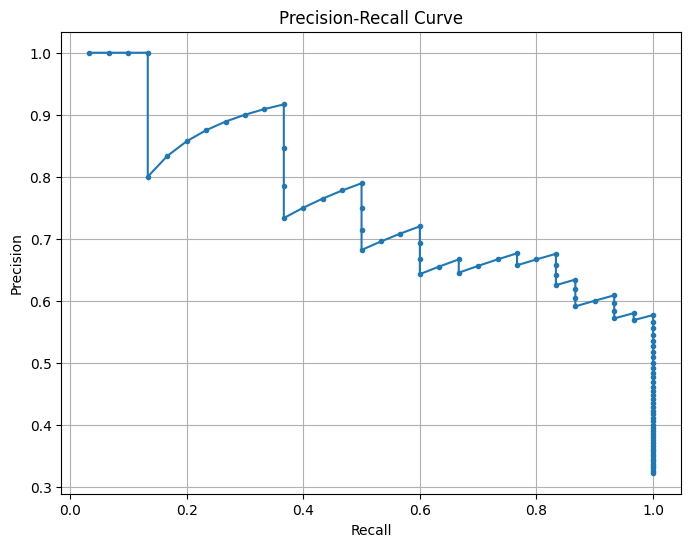

In [15]:
#your code here
#画出P-R曲线

# 计算查准率和查全率
precision = tps / (tps + fps)
precision[np.isnan(precision)] = 0
recall = tps / tps[-1]

# 绘制PR曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()




In [16]:
#your code here
# 计算F1值
f1_list = []
for i in range(len(precision)):
    if precision[i] + recall[i] == 0:
        f1_list.append(0)
    else:
        f1 = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
        f1_list.append(f1)

# 打印各个阈值下的 F1 度量值
for i in range(len(thresholds)):
    print(f"阈值: {thresholds[i]:.4f}, F1度量: {f1_list[i]:.4f}")

阈值: 1.0000, F1度量: 0.0645
阈值: 1.0000, F1度量: 0.1250
阈值: 1.0000, F1度量: 0.1818
阈值: 1.0000, F1度量: 0.2353
阈值: 1.0000, F1度量: 0.2286
阈值: 1.0000, F1度量: 0.2778
阈值: 0.9999, F1度量: 0.3243
阈值: 0.9997, F1度量: 0.3684
阈值: 0.9997, F1度量: 0.4103
阈值: 0.9971, F1度量: 0.4500
阈值: 0.8259, F1度量: 0.4878
阈值: 0.8120, F1度量: 0.5238
阈值: 0.0436, F1度量: 0.5116
阈值: 0.0219, F1度量: 0.5000
阈值: 0.0024, F1度量: 0.4889
阈值: 0.0009, F1度量: 0.5217
阈值: 0.0001, F1度量: 0.5532
阈值: 0.0000, F1度量: 0.5833
阈值: 0.0000, F1度量: 0.6122
阈值: 0.0000, F1度量: 0.6000
阈值: 0.0000, F1度量: 0.5882
阈值: 0.0000, F1度量: 0.5769
阈值: 0.0000, F1度量: 0.6038
阈值: 0.0000, F1度量: 0.6296
阈值: 0.0000, F1度量: 0.6545
阈值: 0.0000, F1度量: 0.6429
阈值: 0.0000, F1度量: 0.6316
阈值: 0.0000, F1度量: 0.6207
阈值: 0.0000, F1度量: 0.6441
阈值: 0.0000, F1度量: 0.6667
阈值: 0.0000, F1度量: 0.6557
阈值: 0.0000, F1度量: 0.6774
阈值: 0.0000, F1度量: 0.6984
阈值: 0.0000, F1度量: 0.7188
阈值: 0.0000, F1度量: 0.7077
阈值: 0.0000, F1度量: 0.7273
阈值: 0.0000, F1度量: 0.7463
阈值: 0.0000, F1度量: 0.7353
阈值: 0.0000, F1度量: 0.7246
阈值: 0.0000, F1度量: 0.7143


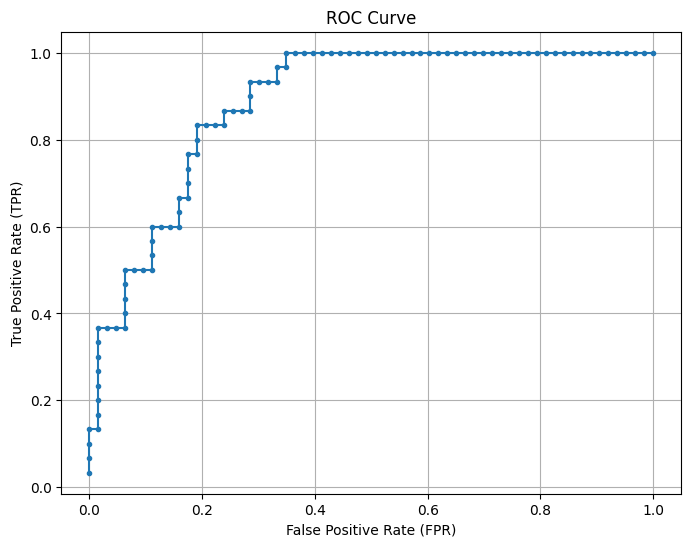

In [17]:
#your code here
#画出ROC曲线

# 计算真正例率和假正例率
tpr = tps / tps[-1]
fpr = fps / fps[-1]

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid(True)
plt.show()



**<font color = blue size=4>第五部分:作业提交</font>**

<span style="color:purple">1) 实验报告提交地址 (格式: 学号+姓名+实验四): https://send2me.cn/4-3oEngJ/Qp-icPERnYPjPQ ,
    下周因为国庆假期所以实验课不上，本次实验报告的截止日期为10.8 14:20</span>

<span style="color:purple">2) 实验课件获取地址: https://www.jianguoyun.com/p/Dae3tZUQp5WhChiClp0FIAA</span>